In [1]:
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
driver = webdriver.Chrome("C:/Users/Anirudh/Downloads/chromedriver/chromedriver.exe")
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.keys import Keys

In [2]:
def login():
    
    driver.get("https://www.instagram.com")
    time.sleep(3)
    
    userName = driver.find_element_by_name('username')
    userName.send_keys("SAMPLE USERNAME")
    
    password = driver.find_element_by_name('password')
    password.send_keys('SAMPLE PASSWORD')
    
    btn = driver.find_element_by_class_name('sqdOP')
    btn.submit()
    
login()

# Question 1

Part 1

In [32]:
def getTop5():

    driver.get("https://www.instagram.com")

    #make a dictionary which will store the igHandle as key and their number of values followers as value
    d = {}
    for i in range(10):

        search = driver.find_element_by_class_name('XTCLo')
        search.send_keys('food')
        time.sleep(3)


        accounts = driver.find_elements_by_css_selector(".fuqBx a.yCE8d")
        account = accounts[i]
        account.click()
        time.sleep(3)

        name = driver.find_element_by_tag_name("h2").text
        followers = driver.find_element_by_css_selector("a._81NM2 span.g47SY").get_attribute('title')
        followers = followers.replace(",", "")
        followers = int(followers)

        d[name] = followers

        driver.back()
        time.sleep(2)

    arr = list(d.items())
    
    #sort the array on the basis of number of followers in descending manner
    arr.sort(key = lambda x : x[-1], reverse = True)
    
    return arr

arr = getTop5()
print("The top 5 handles with the maximum followers are: ")

for i in range(5):
    print(arr[i][0], ':', arr[i][1])

The top 5 handles with the maximum followers are: 
yourfoodlab : 1456582
dilsefoodie : 654920
foodtalkindia : 302770
delhifoodwalks : 126895
delhifoodguide : 104460


Part 2

In [45]:
from datetime import date 

def getNumberInLast3Days(accountName):
    
    driver.get("https://www.instagram.com")
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(accountName)
    time.sleep(3)
    
    account = driver.find_element_by_xpath('//div[@class="fuqBx"]/a[1]')
    account.click()
    time.sleep(3)
    
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(2)
    
    posts = driver.find_elements_by_class_name("_9AhH0")
    
    #get the current date
    currDate = date.today()
    i = 0
    
    while True:
        
        currPost = posts[i]
        currPost.click()
        time.sleep(2)
        
        postTime = driver.find_element_by_tag_name("time").get_attribute("title").split(",")
        
        #check if year is equal
        if int(postTime[-1].strip()) == currDate.year:
            
            month, date = postTime[0].split(" ")
            
            #check if month is equal
            if month == currDate.strftime('%B')[:3] and int(date) >= currDate.day - 3:
                i += 1
                close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
                close.click()
                time.sleep(2)
            else:
                return i
        else:
            return i
        
        
#get the top 5 array from the Part 1 function
arr = getTop5()

#make a dictionary which will store igHandle as key and the number of required posts as value
d = {}
for i in range(5):
    
    accountName = arr[i][0]
    numberOfPosts = getNumberInLast3Days(accountName)
    d[accountName] = numberOfPosts
    
    print(accountName, numberOfPosts)
    
    
        
    


yourfoodlab 5
dilsefoodie 2
foodtalkindia 4
delhifoodwalks 4
delhifoodguide 0


Part 3

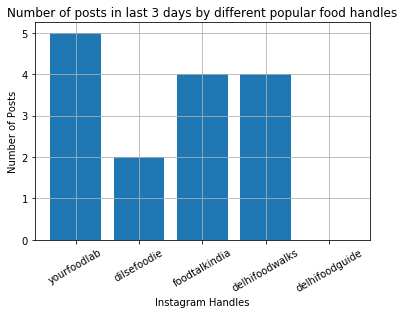

In [49]:
import matplotlib.pyplot as plt

#get the top 5 array from the Part 1 function
arr = getTop5()

#make a dictionary which will store igHandle as key and the number of required posts as value like in above part 2
d = {}

for i in range(5):
    accountName = arr[i][0]
    numberOfPosts = getNumberInLast3Days(accountName)
    d[accountName] = numberOfPosts
    
handles = list(d.keys())
numberOfposts = list(d.values())

#plot the bar-graph
plt.bar(handles, numberOfposts)
plt.xlabel("Instagram Handles")
plt.ylabel("Number of Posts")
plt.title("Number of posts in last 3 days by different popular food handles")
plt.xticks(rotation = 30)
plt.grid()
plt.show()


# Question 2

Part 1

In [51]:
def getHashtags(accountName, hashtags):
    
    driver.get("https://www.instagram.com")
    search = driver.find_element_by_class_name('XTCLo')
    
    #search for the account
    search.send_keys(accountName)
    time.sleep(3)
    
    #click on the account
    account = driver.find_element_by_xpath('//div[@class="fuqBx"]/a[1]')
    account.click()
    time.sleep(3)
    
    posts = driver.find_elements_by_class_name("_9AhH0")
    
    #iterate over the top 10 posts
    for i in range(10):
        
        currPost = posts[i]
        currPost.click()
        time.sleep(3)
        
        li = driver.find_elements_by_css_selector("div.C4VMK span a.xil3i")
        
        #add all the hashtag in the hashtags list
        for hashtag in li:
            hashtags.append(hashtag.text)
            
        close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
        close.click()
        time.sleep(2)
        

#get the top5 handles
arr = getTop5()

#make an array which will store all the hashtags
hashtags = []

for i in range(5):
    
    accountName = arr[i][0]
    
    getHashtags(accountName, hashtags)
    
print(hashtags)
    

['#Recipe', '#foodie', '#cake', '#streetfood', '#streetstyle', '#cakesofinstagram', '#cake', '#baking', '#bakingtime', '#streetfood', '#sanjyotkeer', '#cakestagram', '#cakelover', '#TwistedRecipe', '#recipe', '#foodiesofinstagram', '#aloo', '#foodporn', '#streetfood', '#indianfood', '#indiancuisine', '#MorphyRichards', '#CookItMyWay', '#CookItMyWay', '#recipes', '#idli', '#idlilove', '#southindianfood', '#southindian', '#foodporn', '#foodies', '#streetfood', '#streetstyle', '#indiancuisine', '#recipe', '#recipeoftheday', '#idli', '#masala', '#southindianfood', '#foodporn', '#streetfood', '#mumbaistreetfood', '#fooddaily', '#yourfoodtographer', '#streetstyle', '#sanjyotkeer', '#instadaily', '#recipe', '#foodie', '#comfortfood', '#streetfood', '#indiancuisine', '#food', '#foodporn', '#bhindimasala', '#streetstyle', '#sanjyotkeer', '#MorphyRichards', '#CookItMyWay', '#CookItMyWay', '#recipe', '#foodie', '#comfortfood', '#streetfood', '#indiancuisine', '#sanjyotkeer', '#foodporn', '#recipe

Part 2

In [52]:
#make a frequency map for all the above hashtags
#it will store key as hashtags and their frequency as value
freqMap = {}

for hashtag in hashtags:
    freqMap[hashtag] = freqMap.get(hashtag, 0) + 1
    
for key in freqMap:
    print(key, ':', freqMap[key])

#Recipe : 1
#foodie : 4
#cake : 2
#streetfood : 8
#streetstyle : 4
#cakesofinstagram : 1
#baking : 1
#bakingtime : 1
#sanjyotkeer : 5
#cakestagram : 1
#cakelover : 1
#TwistedRecipe : 1
#recipe : 5
#foodiesofinstagram : 1
#aloo : 1
#foodporn : 7
#indianfood : 1
#indiancuisine : 5
#MorphyRichards : 2
#CookItMyWay : 4
#recipes : 1
#idli : 2
#idlilove : 1
#southindianfood : 2
#southindian : 1
#foodies : 1
#recipeoftheday : 1
#masala : 1
#mumbaistreetfood : 1
#fooddaily : 1
#yourfoodtographer : 1
#instadaily : 1
#comfortfood : 3
#food : 3
#bhindimasala : 1
#palak : 1
#paneer : 1
#rajma : 1
#foodphotography : 2
#dilsefoodie : 10
#southdelhi : 1
#gk1 : 1
#delhitovrindavan : 1
#Onedaytrip : 1
#GiveawayAlert : 1
#HendricksMidsummer : 3
#HendricksGin : 2
 : 21
#IgotGinspired : 1
#daulatkichaat : 1
#puranidilli : 3
#foodstyling : 1
#foodblogger : 1
#foodexplorer : 1
#mithai : 2
#yummy : 2
#tasty : 3
#delish : 3
#yumm : 2
#nomnom : 2
#sogood : 1
#malai : 1
#makhanmalai : 1
#sodelhi : 3
#lbb : 3
#f

Part 3

In [57]:
#make a dataframe using the above frequency map of hashtags
data = {"Hashtags": list(freqMap.keys()), "Frequency": list(freqMap.values())}
df = pd.DataFrame(data)

#save to csv file
csv_file = df.to_csv('hashtags.csv', index = False)
df

,Hashtags,Frequency
0,#Recipe,1
1,#foodie,4
2,#cake,2
3,#streetfood,8
4,#streetstyle,4
...,...,...
149,#delhites,1
150,#delhilove,1
151,#foodislife,1
152,#fatehkikachori,1


Part 4

In [61]:
import numpy as np

#drop the nan values in hashtag
df["Hashtags"].replace("", np.nan, inplace = True)
df.dropna(inplace = True)

#sort the dataframe according to the frequency of hashtags in descending manner
df.sort_values(by = "Frequency", ascending = False, inplace = True)
df

#the hashtags are now arranged on the basis of their frequency
#the most popular hashtag is at the top

,Hashtags,Frequency
39,#dilsefoodie,10
3,#streetfood,8
15,#foodporn,7
12,#recipe,5
17,#indiancuisine,5
...,...,...
60,#sogood,1
53,#foodexplorer,1
52,#foodblogger,1
51,#foodstyling,1


Part 5

#dilsefoodie : 10
#streetfood : 8
#foodporn : 7
#recipe : 5
#indiancuisine : 5


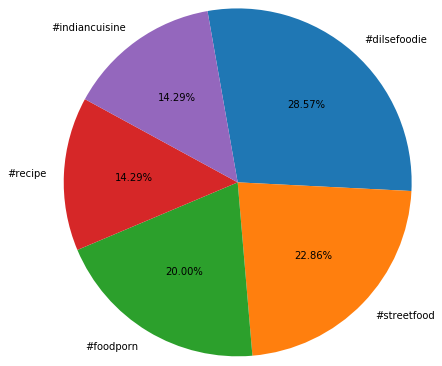

In [70]:
#get the top 5 hashtags
hashtags = list(df.iloc[:5, 0])

#get the frequency of top 5 hashtags
frequency = list(df.iloc[:5, 1])

for i in range(len(hashtags)):
    
    print(hashtags[i], ':', frequency[i])
    
#plot the pie-chart
plt.pie(frequency, labels = hashtags, counterclock = False, radius = 2, startangle = 100, autopct = "%.2f%%")
plt.show()

# Question 3

Part 1

In [80]:
from selenium.common.exceptions import NoSuchElementException

def getNumberOfLikes(accountName):
    
    driver.get("https://www.instagram.com")
    search = driver.find_element_by_class_name('XTCLo')
    
    #search for account
    search.send_keys(accountName)
    time.sleep(3)

    #click on the account
    account = driver.find_element_by_xpath('//div[@class="fuqBx"]/a[1]')
    account.click()
    time.sleep(3)

    posts = driver.find_elements_by_class_name("_9AhH0")
    totalLikes = 0

    #iterate over top 10 posts and all all of their likes into a variable totalLikes
    for i in range(10):

        currPost = posts[i]
        currPost.click()
        time.sleep(3)
        

        try:
            
            likes = int(driver.find_element_by_css_selector("div.Nm9Fw span").text.replace(",", ""))
            totalLikes += likes
        
        
        except NoSuchElementException:
            
            driver.find_element_by_class_name("vcOH2").click()
            time.sleep(1)
            totalLikes += int(driver.find_element_by_css_selector("div.vJRqr span").text.replace(",", ""))
            driver.find_element_by_class_name("QhbhU").click()
            time.sleep(1)
        
        close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
        close.click()
        time.sleep(2)
        
    return totalLikes
    
    
#make a dictionary to store key as handle and their likes as values
likeDict = dict()

#loop through the 5 most popular handles
for i in range(5):
    
    accountName = arr[i][0]
    likeDict[accountName] = getNumberOfLikes(accountName)
    
    print(accountName, ":", likeDict[accountName], "number of likes in top 10 posts")
    

    

yourfoodlab : 216251 number of likes in top 10 posts
dilsefoodie : 127640 number of likes in top 10 posts
foodtalkindia : 5348 number of likes in top 10 posts
delhifoodwalks : 12486 number of likes in top 10 posts
delhifoodguide : 10439 number of likes in top 10 posts


Part 2

In [83]:
#after obtaining the likeDict from the above function

for igHandle in likeDict:
    
    #for finding average, take integer division by 10
    likeDict[igHandle] //= 10
    
    print(igHandle, ":", likeDict[igHandle], "number of average likes")
    


yourfoodlab : 21625 number of average likes
dilsefoodie : 12764 number of average likes
foodtalkindia : 534 number of average likes
delhifoodwalks : 1248 number of average likes
delhifoodguide : 1043 number of average likes


Part 3

In [90]:
#get the followers dictionary from question 1 for top 5 igHandles
followersDict = dict(arr[:5])

#make a dictionary which will store igHandle as keys and their average folloers:like ratio as value
ratio = dict()

for key in followersDict:
    
    igHandle = key
    followers = followersDict[igHandle]
    avgLikes = likeDict[igHandle]
    
    ratio[igHandle] = avgLikes/followers
    
    #print the ratio rounded off to 3 decimal places
    print(igHandle, ":", "{0:.3f}".format(ratio[igHandle]))
    
    

yourfoodlab : 0.015
dilsefoodie : 0.019
foodtalkindia : 0.002
delhifoodwalks : 0.010
delhifoodguide : 0.010


Part 4

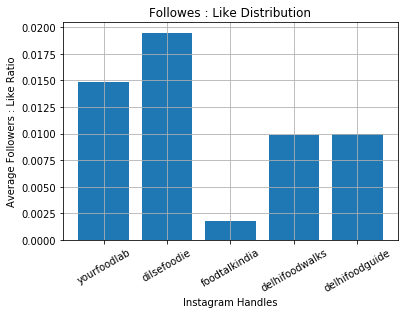

In [91]:
#get the accountNames
igHandles = list(ratio.keys())

#get the average followers:like ratio
followersLikeRatio = list(ratio.values())

#plot the bargraph
plt.bar(igHandles, followersLikeRatio)
plt.xlabel("Instagram Handles")
plt.xticks(rotation = 30)
plt.ylabel("Average Followers : Like Ratio")
plt.title("Followes : Like Distribution")
plt.grid()
plt.show()